In [2]:
!pip3 install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.0 MB/s eta 0:00:0011.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 7.3 MB/s eta 0:00:0011.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.8 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 4.8 MB/s eta 0:00:000m eta 0:00:01
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.10
    Uninstalling jupyterlab-widgets-3.0.10:
      Successfully uninstalled j

In [27]:
from fastbook import *

In [70]:
urls = search_images_ddg('kelpie photo', max_images=1)
len(urls),urls[0]


(1,
 'http://www.petpaw.com.au/wp-content/uploads/2014/09/Australian-Kelpie-11.jpg')

In [72]:
dest = Path('dog.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

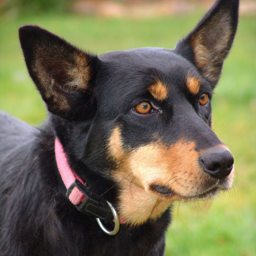

In [73]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [19]:
!mkdir dog_or_not

In [50]:
searches = 'cat','dog'
path = Path('dog_or_not')

if path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} photo')
        download_images(dest, urls = results[:200])
        resize_images(dest, max_size=400, dest=dest)

/home/mardos/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/mardos/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/mardos/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [51]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);


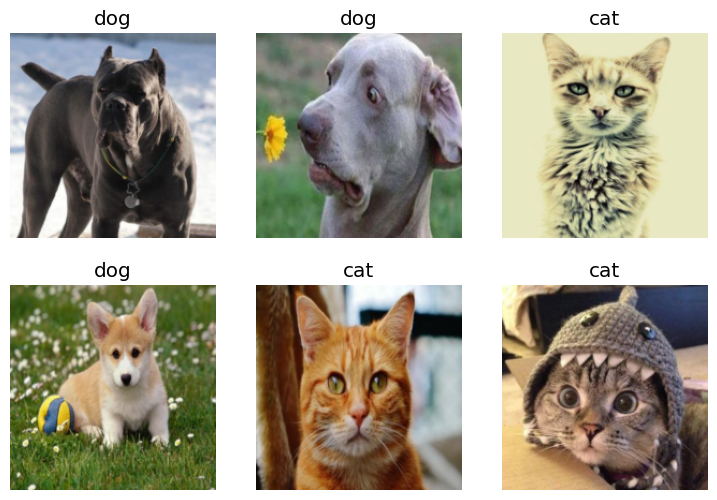

In [52]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [81]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.959067,0.161183,0.042857,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.176702,0.042795,0.014286,00:11
1,0.098396,0.014604,0.000000,00:11
2,0.067066,0.011571,0.000000,00:12
3,0.052194,0.018161,0.014286,00:12
4,0.043077,0.022279,0.014286,00:12
5,0.034604,0.025409,0.014286,00:12


In [83]:
is_dog,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {is_dog}.")
print(f"Probability it's a {is_dog}: {probs[0]:.4f}")

This is a: dog.
Probability it's a dog: 0.0000
